In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt

from scipy.fftpack import fft
from scipy import signal

Ganglion Channel Map

<img src="https://raw.githubusercontent.com/OpenBCI/Docs/master/assets/images/ganglion_10-20-positions.png" width="300">

## Data Preparation

In [2]:
colNames = ['timeStamp', 'c1' ,'c2', 'c3', 'c4', 'a1', 'a2', 'a3', 'ganglionTime']
data = pd.read_csv("../Data/OpenBCI-RAW-Both_leg_2019-01-26_17-35-58.txt", sep=',', names=colNames)

In [3]:
data = data[6:]

In [4]:
data.head(5)

,timeStamp,c1,c2,c3,c4,a1,a2,a3,ganglionTime
6,0,-428.66,-44.34,268.91,-3101.61,0.0,0.0,0.0,17:38:28.136
7,1,-428.74,-41.93,287.75,-3146.78,0.0,0.0,0.0,17:38:28.167
8,2,-389.52,-33.13,269.52,-3270.73,0.0,0.0,0.0,17:38:28.167
9,3,-366.44,-23.10,258.74,-3216.80,0.0,0.0,0.0,17:38:28.168
10,4,-413.11,-37.92,296.88,-3107.77,0.0,0.0,0.0,17:38:28.168


## Time Domain Analysis

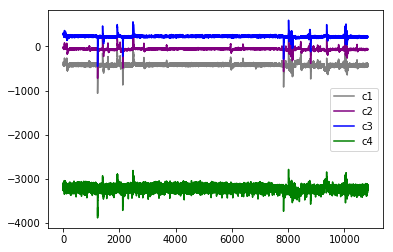

In [5]:
plt.plot(data['c1'],'grey')
plt.plot(data['c2'],'purple')
plt.plot(data['c3'],'blue')
plt.plot(data['c4'],'green')
plt.legend()

plt.show()

## Frequency Domain Analysis

In [6]:
# plt.plot(np.log(fft(sig[:20])))

In [7]:
data.shape

(10819, 9)

In [8]:
X = np.array(data.ix[250:, 1:5])
X.shape

/home/krohak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(10575, 4)

In [9]:
X

array([[ -424.82,   -50.77,   245.92, -3144.49],
       [ -450.36,   -56.32,   269.1 , -3152.73],
       [ -389.55,   -39.18,   234.81, -3212.7 ],
       ..., 
       [ -439.77,   -78.01,   206.76, -3193.55],
       [ -460.49,   -81.65,   229.02, -3143.9 ],
       [ -411.66,   -57.  ,      nan,      nan]])

Estimate power spectral density using Welch’s method.

Welch’s method computes an estimate of the power spectral density by dividing the data into overlapping segments, computing a modified periodogram for each segment and averaging the periodograms.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html

In [10]:
freq, y = signal.welch(X.T, fs=200.0) 

In [11]:
y = y.T

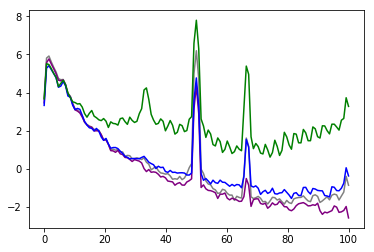

In [12]:
color = ['grey', 'purple', 'blue', 'green']
for i in range(y.shape[1]):
    _ = plt.plot(freq, np.log(y[:, i]), label='Channel {}'.format(i+1), c=color[i])

** Alpha waves!! ** 

## Spectrogram Analysis

In [22]:
data.shape

(10819, 9)

In [23]:
X = np.array(data.ix[250:, 1:5])
X.shape

(10575, 4)

In [24]:
sig = X[:, 0]

In [25]:
sig.shape

(10575,)

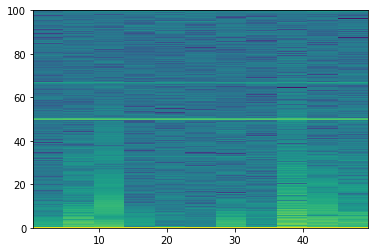

In [26]:
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

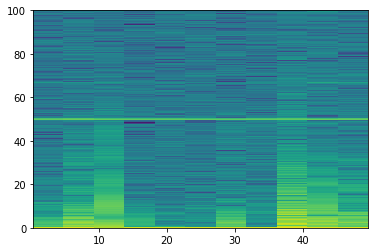

In [27]:
sig = X[:, 1]
_ = plt.specgram(sig, NFFT=1024, Fs=200.0) # sampling rate is 200hz

In [28]:
# sig = X[:, 1]
# _ = plt.specgram(sig, NFFT=1024, Fs=200.0) # sampling rate is 200hz

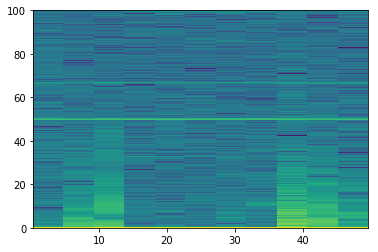

In [29]:
sig = X[:, 2]
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

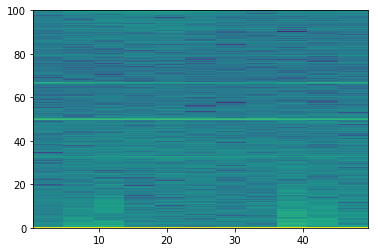

In [30]:
sig = X[:, 3]
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)